# Resultados del entrenamiento centralizado (10000 imágenes)
---
## Resultados obtenidos en el entrenamiento

### Métricas Finales:
- **Accuracy:**  0.7193
- **Precision:** 0.2603
- **Recall:**    0.8292
- **AUC:**       0.8429

### Umbral Óptimo (F1-máximo):
- **Threshold:** 0.697

---


El modelo alcanzó un accuracy de 0.7193, lo que indica que aproximadamente 7 de cada 10 predicciones fueron correctas. Este valor sugiere un desempeño general aceptable, aunque no óptimo, considerando la naturaleza crítica del problema (detección de melanomas).

La precisión de 0.2603 implica que solo alrededor del 26% de las muestras clasificadas como positivas (melanoma) fueron realmente casos de melanoma. Es decir, hay una alta tasa de falsos positivos.

En contraste, el recall de 0.8292 muestra que el modelo identificó correctamente el 83% de todos los casos reales de melanoma. Esto es positivo en el contexto médico, donde es preferible detectar la mayoría de los casos verdaderos, aunque se sacrifiquen falsos positivos.

El valor de AUC de 0.8429 indica una buena capacidad del modelo para distinguir entre clases (melanoma y no melanoma), siendo robusto a variaciones en el umbral de decisión.

El umbral óptimo identificado fue de 0.697, lo que sugiere que ajustar el punto de corte del clasificador mejora su equilibrio entre precisión y recall, priorizando el recall como suele hacerse en escenarios clínicos.



---

### Resumen del Tiempo de Entrenamiento:
- **Tiempo total:** 6792.94 segundos
- **Tiempo promedio por época:** 338.51 segundos

---

A continuación se presentan los gráficos de evolución de la pérdida durante el entrenamiento y la validación del modelo. Estos gráficos muestran cómo la pérdida disminuye a medida que avanza el entrenamiento, lo que indica una mejora en el rendimiento del modelo.

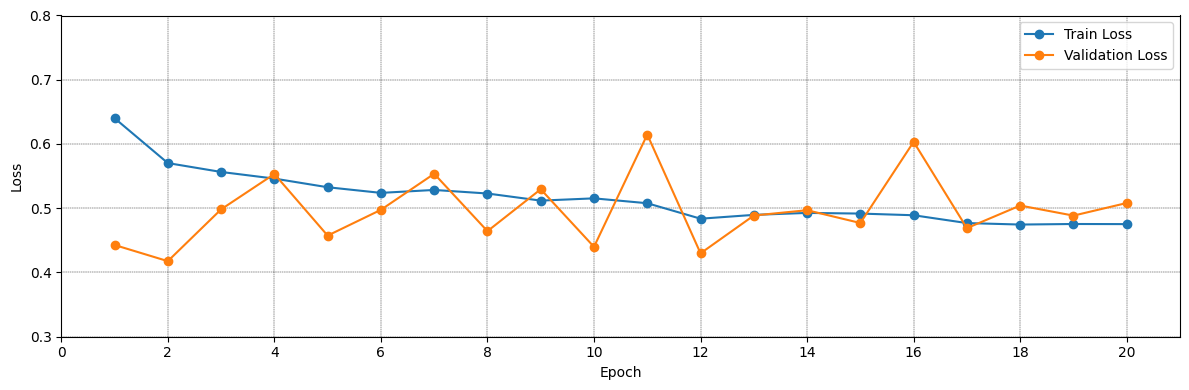

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo limpio sin fondo gris
plt.style.use('default')  # Fondo blanco, cuadrícula clara

# Ruta al CSV
csv_path = 'evaluations/trains/20250519_012741/loss_data.csv'
df = pd.read_csv(csv_path)

# Extraer datos
epochs = df["epoch"]
loss = df["train_loss"]
val_loss = df["val_loss"]

# Crear gráfico
plt.figure(figsize=(12, 4))
plt.plot(epochs, loss, "-o", label="Train Loss")
plt.plot(epochs, val_loss, "-o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.3, 0.8)

# Escalado del eje X
if len(epochs) <= 15:
    step = 1
elif len(epochs) <= 40:
    step = 2
else:
    step = 5

max_epoch = epochs.iloc[-1]
plt.xlim(0, max_epoch + 1)
plt.xticks(np.arange(0, max_epoch + 2, step))

# Cuadrícula negra clara sobre fondo blanco
plt.grid(True, color='black', linestyle='--', linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()


## Resultados Obtenidos en la Evaluación

A continuación se presentan los resultados obtenidos tras evaluar el modelo con el conjunto de prueba.

### Métricas de Evaluación:
- **Accuracy:**  0.9119
---
- **Precision clase 0 (No MEL):** 0.9586
- **Recall clase 0 (No MEL):**    0.9419
- **F1-score clase 0 (No MEL):**  0.9501
---
- **Precision clase 1 (MEL):**    0.5833
- **Recall clase 1 (MEL):**       0.6667
- **F1-score clase 1 (MEL):**     0.6222
---
- **ROC AUC:**                    0.9251
- **F1-score promedio (macro):** 0.7862
- **Precision promedio (macro):** 0.7710
- **Recall promedio (macro):**    0.8043

---

El modelo obtuvo un **accuracy de 0.9119**, lo que significa que más de 9 de cada 10 predicciones fueron correctas. Este es un resultado excelente en términos de rendimiento general, pero debe interpretarse con cautela debido al posible desbalance de clases.

Para la **clase 0 (No MEL)**, las métricas son sobresalientes:
- **Precisión de 0.9586**: casi todas las muestras clasificadas como “no melanoma” fueron correctas.
- **Recall de 0.9419**: casi todos los casos reales de “no melanoma” fueron detectados.
- **F1-score de 0.9501**: excelente equilibrio entre precisión y recall.

En cambio, para la **clase 1 (MEL)**, que es la más crítica en un contexto clínico:
- **Precisión de 0.5833**: aproximadamente el 58% de los casos predichos como melanoma lo eran en realidad.
- **Recall de 0.6667**: el modelo detectó correctamente dos tercios de los casos reales de melanoma.
- **F1-score de 0.6222**: indica un rendimiento aceptable, pero aún con margen de mejora.

La **AUC de 0.9251** reafirma una alta capacidad del modelo para discriminar entre ambas clases.

Los **promedios macro** (que tratan por igual ambas clases) están todos por encima del 0.77, lo cual sugiere que, a pesar del desequilibrio, el modelo mantiene un desempeño razonablemente equilibrado.



### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = 0.697):

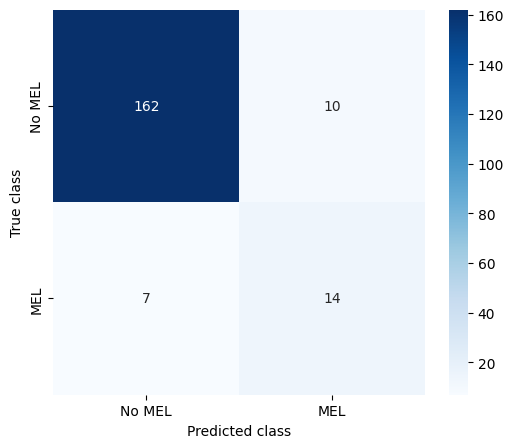

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionModeloCentralizado/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()


La matriz de confusión corresponde a la evaluación del modelo utilizando el **umbral óptimo recomendado** (threshold ajustado para maximizar el F1-score).

- **Verdaderos negativos (No MEL):** 162
- **Verdaderos positivos (MEL):** 14
- **Falsos positivos:** 10
- **Falsos negativos:** 7

El modelo logra una **alta exactitud global (~91%)**, mostrando una excelente capacidad para identificar correctamente los casos negativos. En la clase MEL, obtiene un **recall del 66.7%**, detectando dos tercios de los casos reales de melanoma.

Si bien aún presenta algunos falsos positivos, el modelo ofrece un **buen equilibrio entre precisión y sensibilidad**.

---
# Resultados del entrenamiento base para la aplicación del aprendizaje federado (4000 imágenes)

## Resultados obtenidos en el entrenamiento

### Métricas Finales:
- **Accuracy:**  0.7237
- **Precision:** 0.2811
- **Recall:**    0.8478
- **AUC:**       0.8544

### Umbral Óptimo (F1-máximo):
- **Threshold:** 0.637

---

En esta fase inicial del aprendizaje federado, el modelo alcanzó un accuracy de 0.7237, lo que indica que más de 7 de cada 10 predicciones fueron correctas. Aunque no es un valor especialmente alto, se encuentra dentro de lo esperable para una primera etapa con datos distribuidos y sin centralización.

La precisión de 0.2811 es baja, lo que significa que solo el 28% de las predicciones positivas fueron verdaderos casos de melanoma. Esto sugiere una alta proporción de falsos positivos, un comportamiento común en modelos diseñados para priorizar la detección de casos verdaderos.

La recuperación (recall) de 0.8478 es notablemente alta, lo que indica que el modelo identificó más del 84% de los melanomas reales. Este es un comportamiento deseado en contextos médicos, donde es preferible errar por exceso (falsos positivos) que por defecto (falsos negativos).

El AUC de 0.8544 es un buen indicador de la capacidad del modelo para discriminar entre clases, incluso si el umbral aún no está optimizado.

Finalmente, el umbral óptimo de 0.637 sugiere que con un ajuste adecuado del punto de decisión, el equilibrio entre precisión y recall puede mejorarse aún más.

---

### Resumen del Tiempo de Entrenamiento:
- **Tiempo total:** 4607.14 segundos
- **Tiempo promedio por época:** 164.10 segundos

---

A continuación se presentan los gráficos de evolución de la pérdida durante el entrenamiento y la validación del modelo. Estos gráficos muestran cómo la pérdida disminuye a medida que avanza el entrenamiento, lo que indica una mejora en el rendimiento del modelo.


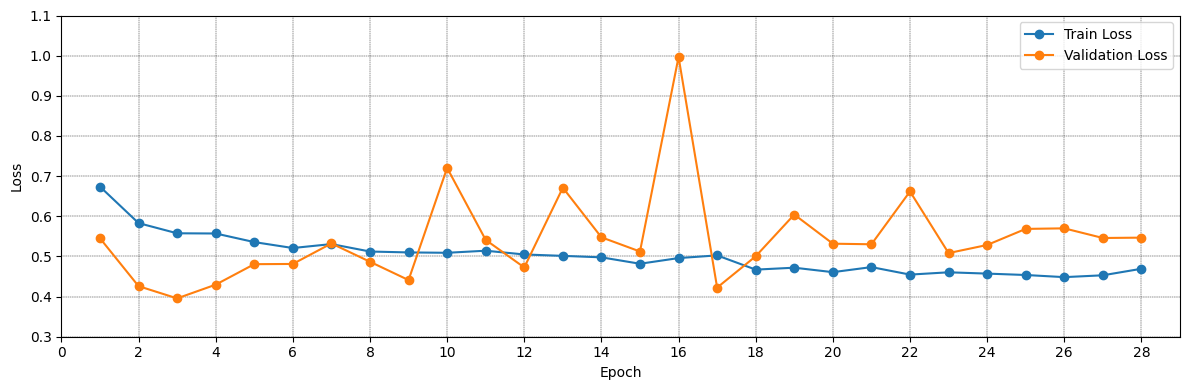

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo limpio sin fondo gris
plt.style.use('default')  # Fondo blanco, cuadrícula clara

# Ruta al CSV
csv_path = 'evaluations/trains/20250514_094100_EntrenamientoBaseFederado/loss_data.csv'  # Ajusta si la ruta cambia
df = pd.read_csv(csv_path)

# Extraer datos
epochs = df["epoch"]
loss = df["train_loss"]
val_loss = df["val_loss"]

# Crear gráfico
plt.figure(figsize=(12, 4))
plt.plot(epochs, loss, "-o", label="Train Loss")
plt.plot(epochs, val_loss, "-o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.3, 1.1)

# Escalado del eje X
if len(epochs) <= 15:
    step = 1
elif len(epochs) <= 40:
    step = 2
else:
    step = 5

max_epoch = epochs.iloc[-1]
plt.xlim(0, max_epoch + 1)
plt.xticks(np.arange(0, max_epoch + 2, step))

# Cuadrícula negra clara sobre fondo blanco
plt.grid(True, color='black', linestyle='--', linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()

## Resultados Obtenidos en la Evaluación

A continuación se presentan los resultados obtenidos tras evaluar el modelo con el conjunto de prueba.

### Métricas de Evaluación:
- **Accuracy:**  0.8705
---
- **Precision clase 0 (No MEL):** 0.9742
- **Recall clase 0 (No MEL):**    0.8779
- **F1-score clase 0 (No MEL):**  0.9235
---
- **Precision clase 1 (MEL):**    0.4474
- **Recall clase 1 (MEL):**       0.8095
- **F1-score clase 1 (MEL):**     0.5763
---
- **ROC AUC:**                    0.9297
- **F1-score promedio (macro):** 0.7499
- **Precision promedio (macro):** 0.7108
- **Recall promedio (macro):**    0.8437

---

El modelo base de aprendizaje federado fue evaluado con un conjunto de prueba y obtuvo un **accuracy de 0.8705**, lo que indica un buen rendimiento general: casi 9 de cada 10 predicciones fueron correctas.

Para la **clase 0 (No MEL)**, los resultados son excelentes:
- **Precisión de 0.9742**: casi todos los casos clasificados como no melanoma eran correctos.
- **Recall de 0.8779**: el modelo logró identificar correctamente a la gran mayoría de los no melanomas reales.
- **F1-score de 0.9235**: muy alto, confirma un rendimiento sólido en esta clase.

Para la **clase 1 (MEL)**:
- **Precisión de 0.4474**: menos de la mitad de las predicciones positivas fueron realmente melanomas, lo que sugiere una considerable cantidad de falsos positivos.
- **Recall de 0.8095**: notablemente alto, el modelo detectó más del 80% de los casos reales de melanoma.
- **F1-score de 0.5763**: aunque no óptimo, es razonable dado el desbalance de clases y el énfasis en recall.

El **AUC de 0.9297** respalda una alta capacidad del modelo para discriminar entre clases, incluso con un umbral no ajustado.

En conjunto, este modelo base de federación ofrece un rendimiento prometedor, con un fuerte enfoque en sensibilidad (recall) que es deseable en el contexto clínico, aunque con margen de mejora en la precisión para la clase positiva.

---

### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = 0.637):


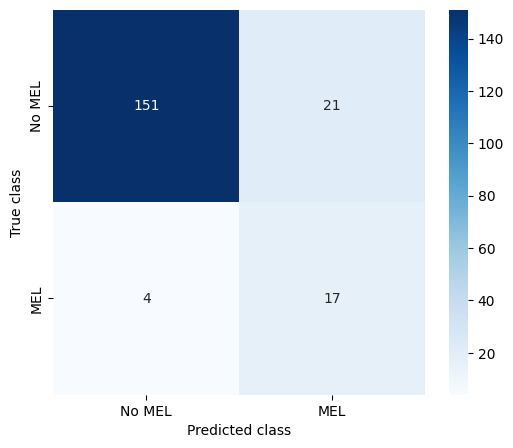

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionModeloFederadoBase/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()


Esta matriz de confusión corresponde al modelo base de aprendizaje federado, evaluado con el **umbral óptimo recomendado**.

- **Verdaderos negativos (No MEL):** 151
- **Falsos positivos:** 21
- **Falsos negativos:** 4
- **Verdaderos positivos (MEL):** 17

El modelo muestra un **recall alto para la clase MEL (80.9%)**, lo que indica una buena capacidad para detectar melanomas reales. La precisión en la clase positiva es más baja debido a los **21 falsos positivos**, aunque este comportamiento es aceptable en contextos clínicos donde se prioriza la sensibilidad.

En conjunto, el modelo base federado ofrece una buena base diagnóstica.

---
# Resultados del reentrenamiento para el usuario '000000000' (2000 imágenes)

## Resultados obtenidos en el reentrenamiento

### Métricas Finales:
- **Accuracy:**  0.7125
- **Precision:** 0.2421
- **Recall:**    0.8313
- **AUC:**       0.8459

### Umbral Óptimo (F1-máximo):
- **Threshold:** 0.696

---

Tras el proceso de reentrenamiento personalizado con 2000 imágenes del usuario '000000000', el modelo alcanzó un **accuracy de 0.7125**, lo que indica que aproximadamente 7 de cada 10 predicciones fueron correctas. Este valor es moderado, aunque esperable dado el tamaño reducido del conjunto y el carácter específico del reentrenamiento.

La **precisión de 0.2421** es baja, lo que significa que menos de una cuarta parte de las predicciones positivas (melanoma) fueron correctas. Esto indica una alta tasa de falsos positivos, reflejando una preferencia por no pasar por alto casos sospechosos.

Por otro lado, el **recall de 0.8313** es alto, lo cual es una señal positiva: el modelo fue capaz de identificar correctamente más del 83% de los casos reales de melanoma, reforzando su utilidad como herramienta de cribado médico.

El valor de **AUC de 0.8459** indica una buena capacidad de discriminación entre clases, incluso considerando el umbral predeterminado.

El **umbral óptimo identificado (0.696)** sugiere un ajuste que favorece la sensibilidad del modelo, coherente con el objetivo clínico de minimizar los falsos negativos.

En resumen, este reentrenamiento ha logrado mantener una alta sensibilidad con un conjunto personalizado, aunque a costa de la precisión.

---

### Resumen del Tiempo de Entrenamiento:
- **Tiempo total:** 796.66 segundos
- **Tiempo promedio por época:** 72.42 segundos

---

A continuación se presentan los gráficos de evolución de la pérdida durante el entrenamiento y la validación del modelo. Estos gráficos muestran cómo la pérdida disminuye a medida que avanza el entrenamiento, lo que indica una mejora en el rendimiento del modelo.

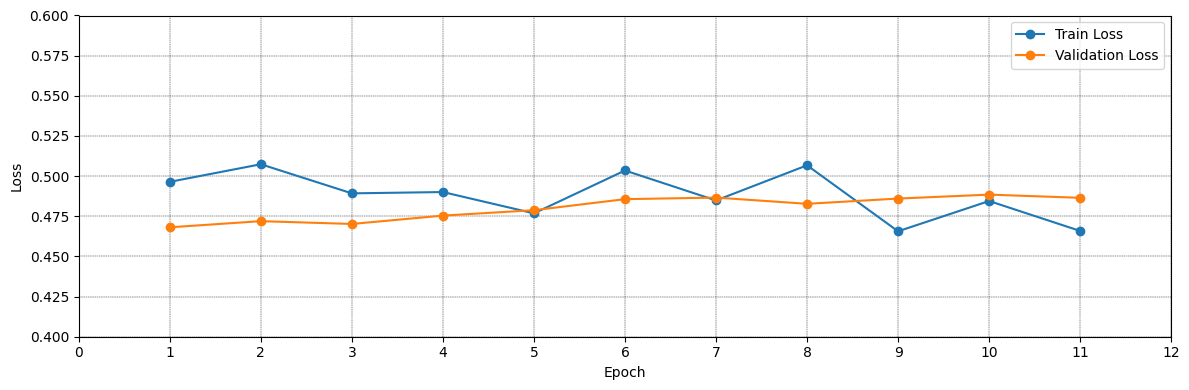

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo limpio sin fondo gris
plt.style.use('default')  # Fondo blanco, cuadrícula clara

# Ruta al CSV
csv_path = 'evaluations/retrain/20250514_115627_000000000/loss_data.csv'  # Ajusta si la ruta cambia
df = pd.read_csv(csv_path)

# Extraer datos
epochs = df["epoch"]
loss = df["train_loss"]
val_loss = df["val_loss"]

# Crear gráfico
plt.figure(figsize=(12, 4))
plt.plot(epochs, loss, "-o", label="Train Loss")
plt.plot(epochs, val_loss, "-o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.4, 0.6)

# Escalado del eje X
if len(epochs) <= 15:
    step = 1
elif len(epochs) <= 40:
    step = 2
else:
    step = 5

max_epoch = epochs.iloc[-1]
plt.xlim(0, max_epoch + 1)
plt.xticks(np.arange(0, max_epoch + 2, step))

# Cuadrícula negra clara sobre fondo blanco
plt.grid(True, color='black', linestyle='--', linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()

## Resultados Obtenidos en la Evaluación

A continuación se presentan los resultados obtenidos tras evaluar el modelo con el conjunto de prueba.

### Métricas de Evaluación:
- **Accuracy:**  0.8756

---

- **Precision clase 0 (No MEL):** 0.9568
- **Recall clase 0 (No MEL):**    0.9012
- **F1-score clase 0 (No MEL):**  0.9281

---

- **Precision clase 1 (MEL):**    0.4516
- **Recall clase 1 (MEL):**       0.6667
- **F1-score clase 1 (MEL):**     0.5385

---

- **ROC AUC:**                    0.9326
- **F1-score promedio (macro):** 0.7333
- **Precision promedio (macro):** 0.7042
- **Recall promedio (macro):**    0.7839

---

En esta evaluación posterior al reentrenamiento, el modelo alcanzó un **accuracy de 0.8756**, lo cual representa un buen desempeño general: casi 88 de cada 100 predicciones fueron correctas. Este valor indica que el modelo se mantuvo robusto tras el reentrenamiento individualizado.

En la **clase 0 (No MEL)**, el rendimiento continúa siendo alto:
- **Precisión de 0.9568**: la mayoría de las predicciones negativas fueron acertadas.
- **Recall de 0.9012**: más del 90% de los casos reales de no melanoma fueron correctamente identificados.
- **F1-score de 0.9281**: confirma un excelente equilibrio en esta clase.

Para la **clase 1 (MEL)**:
- **Precisión de 0.4516**: menos de la mitad de los casos predichos como melanoma fueron correctos, lo que refleja una presencia considerable de falsos positivos.
- **Recall de 0.6667**: el modelo logró identificar correctamente dos tercios de los casos reales de melanoma.
- **F1-score de 0.5385**: ligeramente mejor que en el entrenamiento inicial, pero aún con margen de mejora.

La **AUC de 0.9326** reafirma la buena capacidad del modelo para distinguir entre ambas clases, incluso si la precisión para MEL no es óptima.

Los **promedios macro** —que equilibran el peso de ambas clases— siguen siendo razonables, con valores por encima de 0.70 en todas las métricas, lo que indica que el reentrenamiento no descompensó el modelo.


---

### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = **0.696**):


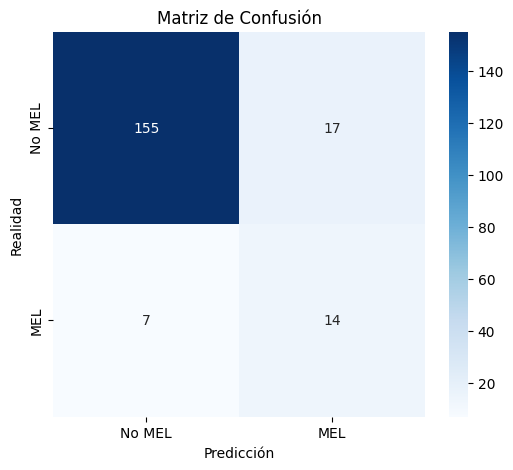

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionReentreno000000000/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


Esta matriz de confusión corresponde a la evaluación del primer modelo reentrenado tras la etapa base federada, usando el **threshold óptimo recomendado**.

- **Verdaderos negativos (No MEL):** 155
- **Falsos positivos:** 17
- **Falsos negativos:** 7
- **Verdaderos positivos (MEL):** 14

El modelo mantiene una **alta capacidad de detección de la clase No MEL**, y presenta un **recall del 66.7% para MEL**, lo que implica que logra identificar correctamente 2 de cada 3 melanomas reales. La **precisión en MEL es moderada**, con 17 falsos positivos, pero dentro de un rango clínicamente tolerable.

Este resultado confirma que el reentrenamiento personalizado no degrada demasiado la sensibilidad crítica del modelo.

---
# Resultados del reentrenamiento para el usuario '111111111' (2015 imágenes)

## Resultados obtenidos en el reentrenamiento

### Métricas Finales:
- **Accuracy:**  0.7246
- **Precision:** 0.2505
- **Recall:**    0.8012
- **AUC:**       0.8342

### Umbral Óptimo (F1-máximo):
- **Threshold:** 0.797

---

Tras el reentrenamiento con 2015 imágenes del usuario '111111111', el modelo alcanzó un **accuracy de 0.7246**, lo que indica que aproximadamente 72 de cada 100 predicciones fueron correctas. Este valor es consistente con lo observado en reentrenamientos personalizados previos y refleja la dificultad del problema con conjuntos limitados.

La **precisión de 0.2505** es baja, lo que implica que solo una de cada cuatro predicciones positivas fue realmente un caso de melanoma. Este patrón sugiere una alta tasa de falsos positivos, lo cual puede ser aceptable si se prioriza la sensibilidad.

El **recall de 0.8012** es notablemente alto: el modelo identificó correctamente más del 80% de los casos reales de melanoma, manteniendo su utilidad en un contexto de cribado temprano donde es crucial no dejar pasar verdaderos positivos.

El valor de **AUC de 0.8342** confirma una buena capacidad discriminativa entre clases, incluso cuando el punto de decisión aún no está ajustado.

El **umbral óptimo (F1-máximo) fue de 0.797**, lo que sugiere que un punto de corte más conservador podría mejorar el balance entre precisión y recall.

En conjunto, el reentrenamiento mantiene una alta sensibilidad, aunque la precisión sigue siendo una debilidad.

---

### Resumen del Tiempo de Entrenamiento:
- **Tiempo total:** 468.41 segundos
- **Tiempo promedio por época:** 66.92 segundos

---

A continuación se presentan los gráficos de evolución de la pérdida durante el entrenamiento y la validación del modelo. Estos gráficos muestran cómo la pérdida disminuye a medida que avanza el entrenamiento, lo que indica una mejora en el rendimiento del modelo.

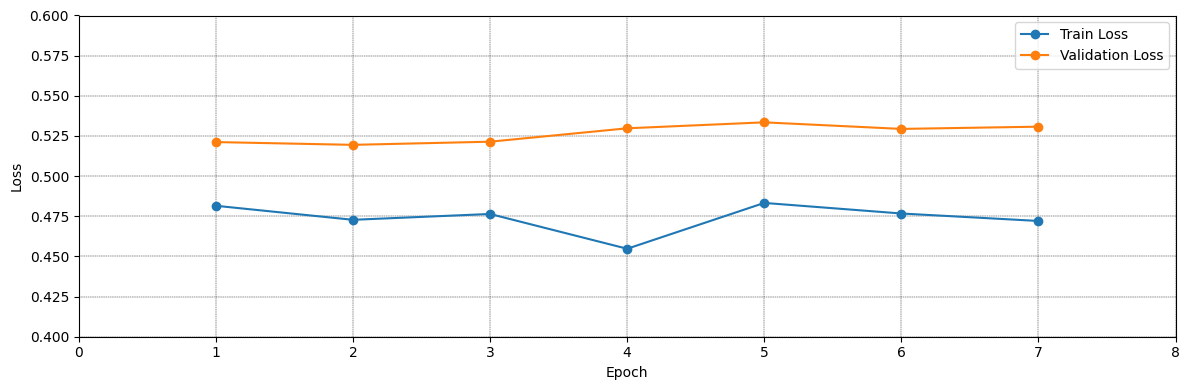

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo limpio sin fondo gris
plt.style.use('default')  # Fondo blanco, cuadrícula clara

# Ruta al CSV
csv_path = 'evaluations/retrain/20250514_131312_111111111/loss_data.csv'  # Ajusta si la ruta cambia
df = pd.read_csv(csv_path)

# Extraer datos
epochs = df["epoch"]
loss = df["train_loss"]
val_loss = df["val_loss"]

# Crear gráfico
plt.figure(figsize=(12, 4))
plt.plot(epochs, loss, "-o", label="Train Loss")
plt.plot(epochs, val_loss, "-o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.4, 0.6)

# Escalado del eje X
if len(epochs) <= 15:
    step = 1
elif len(epochs) <= 40:
    step = 2
else:
    step = 5

max_epoch = epochs.iloc[-1]
plt.xlim(0, max_epoch + 1)
plt.xticks(np.arange(0, max_epoch + 2, step))

# Cuadrícula negra clara sobre fondo blanco
plt.grid(True, color='black', linestyle='--', linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()

## Resultados Obtenidos en la Evaluación

A continuación se presentan los resultados obtenidos tras evaluar el modelo con el conjunto de prueba.

### Métricas de Evaluación:
- **Accuracy:**  0.9119

---

- **Precision clase 0 (No MEL):** 0.9330
- **Recall clase 0 (No MEL):**    0.9709
- **F1-score clase 0 (No MEL):**  0.9516

---

- **Precision clase 1 (MEL):**    0.6429
- **Recall clase 1 (MEL):**       0.4286
- **F1-score clase 1 (MEL):**     0.5143

---

- **ROC AUC:**                    0.9302
- **F1-score promedio (macro):** 0.7329
- **Precision promedio (macro):** 0.7879
- **Recall promedio (macro):**    0.6998


---

En esta evaluación, el modelo reentrenado obtuvo un **accuracy de 0.9119**, lo cual representa un rendimiento general muy alto: más del 91% de las predicciones fueron correctas. Sin embargo, es importante analizar el detalle por clase para entender el equilibrio del modelo.

En la **clase 0 (No MEL)**, el modelo mostró un rendimiento excelente:
- **Precisión de 0.9330**: casi todas las predicciones de “no melanoma” fueron acertadas.
- **Recall de 0.9709**: el modelo identificó correctamente a casi todos los casos reales de no melanoma.
- **F1-score de 0.9516**: un equilibrio óptimo entre precisión y recall en esta clase.

Para la **clase 1 (MEL)**, los resultados fueron más modestos:
- **Precisión de 0.6429**: aproximadamente el 64% de las predicciones de melanoma fueron correctas.
- **Recall de 0.4286**: el modelo identificó menos de la mitad de los melanomas reales, lo que implica una tasa significativa de falsos negativos.
- **F1-score de 0.5143**: evidencia un margen de mejora en la sensibilidad del modelo hacia esta clase crítica.

La **AUC de 0.9302** indica que el modelo tiene una muy buena capacidad para diferenciar entre ambas clases, incluso si la tasa de detección de melanomas puede ser mejorada.

Los **promedios macro** reflejan un rendimiento global equilibrado, pero advierten una ligera descompensación a favor de la clase mayoritaria (No MEL), especialmente en el recall.


---

### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = **0.797**):


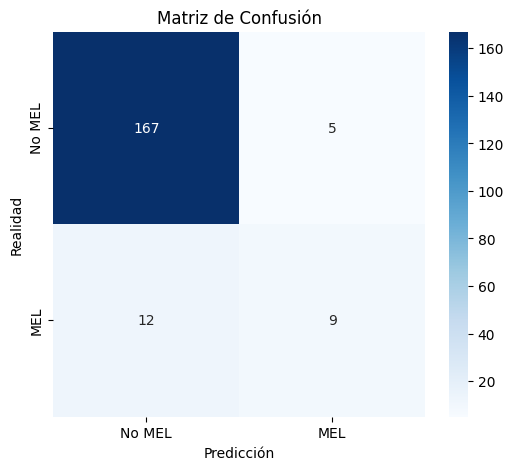

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionReentreno111111111/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


Esta matriz de confusión corresponde al segundo reentrenamiento local evaluado con el **umbral óptimo recomendado**.

- **Verdaderos negativos (No MEL):** 167
- **Falsos positivos:** 5
- **Falsos negativos:** 12
- **Verdaderos positivos (MEL):** 9

El modelo muestra una **muy alta precisión en la clase No MEL**, con solo 5 falsos positivos. Sin embargo, el **recall en MEL cae al 42.9%**, ya que solo se identifican correctamente 9 de los 21 melanomas reales.

Este resultado refleja un cambio en el equilibrio del modelo tras el reentrenamiento: se vuelve más conservador al etiquetar como "MEL", priorizando evitar falsos positivos a costa de aumentar los falsos negativos.

---
# Resultados del reentrenamiento para el usuario '283499999' (2000 imágenes)

## Resultados obtenidos en el reentrenamiento

### Métricas Finales:
- **Accuracy:**  0.6862
- **Precision:** 0.2286
- **Recall:**    0.8081
- **AUC:**       0.8216

### Umbral Óptimo (F1-máximo):
- **Threshold:** 0.692

---

En este reentrenamiento con 2000 imágenes del usuario '283499999', el modelo alcanzó un **accuracy de 0.6862**, el más bajo entre los reentrenamientos registrados. Esto indica que cerca de 7 de cada 10 predicciones fueron correctas, lo cual es aceptable considerando el tamaño limitado del conjunto y la personalización del entrenamiento.

La **precisión de 0.2286** es baja, lo que refleja una alta proporción de falsos positivos: menos de 1 de cada 4 predicciones positivas fue efectivamente un caso de melanoma.

Por el contrario, el **recall de 0.8081** es elevado, mostrando que el modelo fue capaz de identificar correctamente más del 80% de los melanomas reales. Este comportamiento es coherente con un enfoque que privilegia la sensibilidad clínica.

El **AUC de 0.8216** indica una buena capacidad para discriminar entre clases, aunque es el valor más bajo en comparación con otros usuarios.

El **umbral óptimo identificado fue de 0.692**, lo que apunta a una configuración que prioriza la detección (recall) por sobre la precisión.

---

### Resumen del Tiempo de Entrenamiento:
- **Tiempo total:** 1400.44 segundos
- **Tiempo promedio por época:** 70.02 segundos

---

A continuación se presentan los gráficos de evolución de la pérdida durante el entrenamiento y la validación del modelo. Estos gráficos muestran cómo la pérdida disminuye a medida que avanza el entrenamiento, lo que indica una mejora en el rendimiento del modelo.

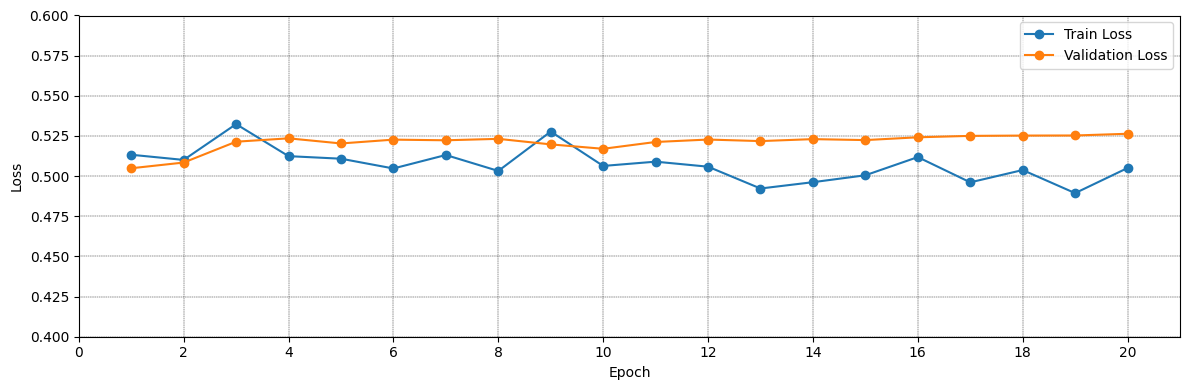

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo limpio sin fondo gris
plt.style.use('default')  # Fondo blanco, cuadrícula clara

# Ruta al CSV
csv_path = 'evaluations/retrain/20250514_121745_283499999/loss_data.csv'  # Ajusta si la ruta cambia
df = pd.read_csv(csv_path)

# Extraer datos
epochs = df["epoch"]
loss = df["train_loss"]
val_loss = df["val_loss"]

# Crear gráfico
plt.figure(figsize=(12, 4))
plt.plot(epochs, loss, "-o", label="Train Loss")
plt.plot(epochs, val_loss, "-o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.4, 0.6)

# Escalado del eje X
if len(epochs) <= 15:
    step = 1
elif len(epochs) <= 40:
    step = 2
else:
    step = 5

max_epoch = epochs.iloc[-1]
plt.xlim(0, max_epoch + 1)
plt.xticks(np.arange(0, max_epoch + 2, step))

# Cuadrícula negra clara sobre fondo blanco
plt.grid(True, color='black', linestyle='--', linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()


## Resultados Obtenidos en la Evaluación

A continuación se presentan los resultados obtenidos tras evaluar el modelo con el conjunto de prueba.

### Métricas de Evaluación:
- **Accuracy:**  0.9016

---

- **Precision clase 0 (No MEL):** 0.9636
- **Recall clase 0 (No MEL):**    0.9244
- **F1-score clase 0 (No MEL):**  0.9436

---

- **Precision clase 1 (MEL):**    0.5357
- **Recall clase 1 (MEL):**       0.7143
- **F1-score clase 1 (MEL):**     0.6122

---

- **ROC AUC:**                    0.9347
- **F1-score promedio (macro):** 0.7779
- **Precision promedio (macro):** 0.7497
- **Recall promedio (macro):**    0.8194

---

En esta evaluación, el modelo reentrenado alcanzó un **accuracy de 0.9016**, indicando que aproximadamente 9 de cada 10 predicciones fueron correctas. Este valor sugiere un excelente rendimiento general tras el reentrenamiento, reflejando mejoras en la adaptación del modelo.

Para la **clase 0 (No MEL)**, el desempeño fue muy alto:
- **Precisión de 0.9636**: la mayoría de las predicciones negativas fueron correctas.
- **Recall de 0.9244**: el modelo identificó correctamente más del 92% de los no melanomas reales.
- **F1-score de 0.9436**: equilibrio excelente entre precisión y recall.

En cuanto a la **clase 1 (MEL)**:
- **Precisión de 0.5357**: poco más de la mitad de las predicciones positivas fueron correctas, indicando aún una presencia significativa de falsos positivos.
- **Recall de 0.7143**: el modelo detectó más del 71% de los casos reales de melanoma, una mejora notable frente a iteraciones anteriores.
- **F1-score de 0.6122**: sugiere un rendimiento razonable, con mejora del equilibrio entre sensibilidad y precisión.

El **AUC de 0.9347** respalda una excelente capacidad del modelo para distinguir entre clases.

Los **promedios macro** (precision, recall y F1-score) se mantienen todos por encima de 0.74, lo que indica un rendimiento general balanceado incluso frente al desbalance de clases.

---

### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = **0.692**):


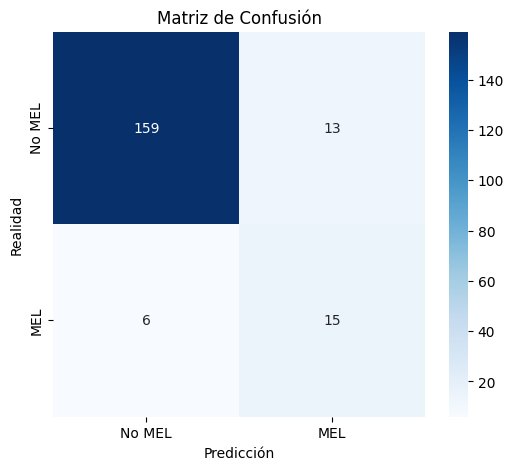

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionReentreno283499999/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


Esta matriz de confusión corresponde al tercer reentrenamiento, evaluado con el **threshold óptimo recomendado**.

- **Verdaderos negativos (No MEL):** 159
- **Falsos positivos:** 13
- **Falsos negativos:** 6
- **Verdaderos positivos (MEL):** 15

El modelo logra un **buen equilibrio**: mantiene una **alta precisión en la clase No MEL**, al tiempo que alcanza un **recall del 71.4% en MEL**, superando los resultados de los reentrenamientos anteriores.

Con solo 6 falsos negativos y 13 falsos positivos, este modelo ofrece una **combinación sólida de sensibilidad y precisión**.

---
# Resultados de la evaluación del modelo medio con el conjunto de prueba tras aplicar el aprendizaje federado (4000 + 2000 + 2000 + 2000 imágenes)

A continuación se presentan los resultados obtenidos al evaluar el modelo medio resultante del proceso de aprendizaje federado.

### Métricas de Evaluación:
- **Accuracy:**  0.8601
---
- **Precision clase 0 (No MEL):** 0.9677
- **Recall clase 0 (No MEL):**    0.8721
- **F1-score clase 0 (No MEL):**  0.9174
---
- **Precision clase 1 (MEL):**    0.4211
- **Recall clase 1 (MEL):**       0.7619
- **F1-score clase 1 (MEL):**     0.5424
---
- **ROC AUC:**                    0.9322
- **F1-score promedio (macro):** 0.7299
- **Precision promedio (macro):** 0.6944
- **Recall promedio (macro):**    0.8170

---

El modelo medio, generado mediante **una agregación federada basada en la media ponderada de los pesos de los modelos locales**, fue evaluado con un conjunto de prueba y alcanzó un **accuracy de 0.8601**, lo que representa un rendimiento general sólido considerando la diversidad y distribución descentralizada de los datos (4000 + 2000 + 2000 + 2000 imágenes).

En la **clase 0 (No MEL)**, el desempeño sigue siendo muy fuerte:
- **Precisión de 0.9677**: casi todas las predicciones negativas fueron correctas.
- **Recall de 0.8721**: se identificó correctamente a la gran mayoría de los casos reales de no melanoma.
- **F1-score de 0.9174**: indica un excelente equilibrio entre precisión y recall.

En la **clase 1 (MEL)**, el modelo muestra mejoras respecto a iteraciones anteriores:
- **Precisión de 0.4211**: aunque sigue siendo baja, refleja una mejora en el filtrado de falsos positivos.
- **Recall de 0.7619**: valor muy alto, lo que demuestra que el modelo detecta más del 76% de los melanomas reales.
- **F1-score de 0.5424**: un rendimiento aceptable y competitivo dado el desbalance y la dificultad inherente de la clase positiva.

La **AUC de 0.9322** confirma una excelente capacidad de discriminación entre clases, similar a la de los mejores modelos individuales.

Los **promedios macro** son sólidos, especialmente el **recall promedio (0.8170)**, que resalta el enfoque sensible del modelo hacia la clase crítica (melanoma), incluso al costo de menor precisión.


---

### Visualizaciones

A continuación se incluye la matriz de confusión generada durante la evaluación del modelo (threshold recomendado por F1-máximo = 0.696):

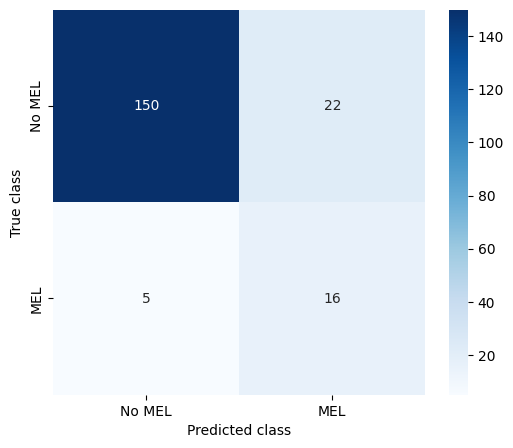

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ruta fija al CSV
csv_path = "evaluations/EvaluacionModeloFederadoMedio/confusion_data.csv"  # Ajusta esta ruta según tu caso

# Cargar datos
df = pd.read_csv(csv_path)

# Validar columnas necesarias
assert {'true_label', 'predicted_label'}.issubset(df.columns), "Faltan columnas necesarias en el CSV."

# Generar matriz de confusión
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No MEL", "MEL"], yticklabels=["No MEL", "MEL"])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()


Esta matriz de confusión representa la evaluación del modelo medio generado por agregación federada (media ponderada de pesos), usando el **umbral óptimo recomendado**.

- **Verdaderos negativos (No MEL):** 150
- **Falsos positivos:** 22
- **Falsos negativos:** 5
- **Verdaderos positivos (MEL):** 16

El modelo logra un **recall alto para la clase MEL (76.2%)**, detectando la mayoría de los casos reales de melanoma. A pesar de los **22 falsos positivos**, la precisión general se mantiene aceptable para una herramienta de cribado médico.

# Comparación entre Entrenamiento Centralizado y Aprendizaje Federado

A continuación se presenta una comparación entre el modelo entrenado de forma **centralizada** y el modelo generado mediante **aprendizaje federado con media ponderada de pesos**. Ambos fueron evaluados con el mismo conjunto de prueba, lo que permite una comparación directa de rendimiento.

| Métrica                     | Centralizado | Federado (modelo medio) |
|-----------------------------|--------------|-------------------------|
| **Accuracy**                | 0.9119       | 0.8601                  |
| **AUC**                     | 0.9251       | 0.9322                  |
| **F1-score clase 1 (MEL)**  | 0.6222       | 0.5424                  |
| **Recall clase 1 (MEL)**    | 0.6667       | 0.7619                  |
| **Precisión clase 1 (MEL)** | 0.5833       | 0.4211                  |
| **F1 macro promedio**       | 0.7862       | 0.7299                  |
| **Recall macro promedio**   | 0.8043       | 0.8170                  |

### Análisis Comparativo

- El modelo **centralizado** muestra mejor rendimiento en precisión general (**accuracy**) y mejor equilibrio entre precisión y recall para la clase MEL (melanoma), lo que se refleja en un **F1-score más alto para MEL**.
- Sin embargo, el modelo **federado obtiene un mejor recall en la clase MEL (76.19%)**, lo que significa que identifica un mayor porcentaje de melanomas reales. Este es un aspecto **crítico en entornos clínicos**, donde el objetivo principal es no dejar pasar casos positivos.
- El modelo federado también alcanza un **AUC levemente superior (0.9322)**, lo que sugiere una **mejor capacidad para discriminar entre clases** a lo largo de diferentes umbrales.
- En términos de macro-promedios, el modelo centralizado tiene mejores valores en precisión y F1, pero el federado mantiene un **recall macro más alto**, alineándose con una política conservadora en salud pública.

### Conclusión

Aunque el modelo centralizado supera al federado en métricas globales de precisión, el **modelo federado demuestra ser competitivo y clínicamente viable**, especialmente cuando se prioriza la detección (recall) de casos positivos.

Además, el aprendizaje federado:
- **Permite entrenamiento colaborativo** entre centros de salud sin compartir información sensible.
- **Escala fácilmente** en entornos distribuidos.

En conjunto, estos resultados **validan el aprendizaje federado como una alternativa eficaz y ética** para aplicaciones médicas de detección temprana, especialmente en escenarios donde la privacidad y la colaboración institucional son fundamentales.